In [1]:
from stable_baselines.td3 import TD3, LnCnnPolicy, LnMlpPolicy
from env import *
import tensorflow as tf
from config import config

/Users/cocowang/anaconda3/envs/rl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/cocowang/anaconda3/envs/rl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/cocowang/anaconda3/envs/rl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/cocowang/anaconda3/envs/rl/lib/python3.6/s

In [ ]:
policy = LnMlpPolicy
env = SketchDesigner(SketchDiscriminator(config['SAVED_GAN']))
agent = TD3(policy, env, random_exploration=0.1, tensorboard_log='./log/',verbose=1)
#agent.get_env().env_method('get_policy', agent.policy_tf)
agent.get_env().get_policy(agent.policy_tf)

In [ ]:
agent.load('./save/model',env = env)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
env.reset()
while True:
    act = agent.predict(env.get_state())[0]
    _, _,terminal,_ = env.step(act)
    if terminal:
        print(env.stroke_count)
        break
        
env.render()

In [ ]:
env.canvas

In [1]:
from pretrianGAN.DataLoader import DataLoader
from pretrianGAN.utils import *
import tensorflow as tf
import numpy as np
from pretrianGAN.config import config

/home/cocowang/anaconda3/envs/baseline/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cocowang/anaconda3/envs/baseline/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cocowang/anaconda3/envs/baseline/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cocowang/anaconda3/envs/base

In [2]:
dloader = DataLoader(config['DATA_PATH'])

#tf.reset_default_graph()
batch_size = config['BATCH_SIZE']
n_noise = config['N_NOISE']

X_in = tf.placeholder(dtype=tf.float32, shape=[None] + config['IMAGE_DIM'], name='X')
noise = tf.placeholder(dtype=tf.float32, shape=[None, n_noise])

rate = tf.placeholder(dtype=tf.float32, name='rate')
is_training = tf.placeholder(dtype=tf.bool, name='is_training')

g = generator(noise, rate=rate, is_training=is_training)
d_real = discriminator(X_in, rate=rate)
d_fake = discriminator(g, rate,reuse=True)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.flatten instead.


In [3]:
saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver.restore(sess, tf.train.latest_checkpoint('./saved_gan/2'))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./saved_gan/2/model1.ckpt


In [4]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.draw import line

In [5]:
n = np.random.uniform(0.0, 1.0, [64, 64]).astype(np.float32)
imgs = sess.run(g, feed_dict = {noise: n,
                               rate: 1.0,
                               is_training: False})

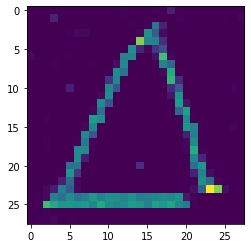

In [13]:
plt.imshow(imgs[2].reshape(28,28))

In [14]:
np.max(imgs[6])

0.015753478

In [15]:
def deblur(img):
    return np.array([np.array([1 if i > 150 else 0 for i in im]) for im in img]).reshape(-1,784)

In [16]:
data = np.load('./data/triangle.npy')
data_new = deblur(data[0:10])

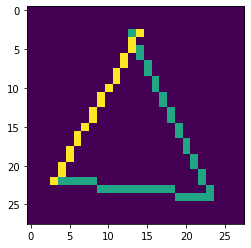

In [23]:
img = np.zeros((28, 28), dtype=np.uint8)
rr, cc = line(3, 13, 24, 23)
img[rr, cc] = 150
rr, cc = line(24, 23, 22, 3)
img[rr, cc] = 150
rr, cc = line(22, 3, 3, 14)
img[rr, cc] = 255
plt.imshow(img)

In [26]:
results = sess.run(d_real, feed_dict = {X_in: imgs[6].reshape(-1,28,28),
                               rate: 1.0,
                               is_training: False})

In [27]:
results

array([[0.18410629]], dtype=float32)